# Answer of the asked questions

- 1 Data has 0 Missing Values & 0 Duplicated values, IQR Method was used to identify Outliers in `amount` and then imputed with median and `oldbalanceOrg`&`newbalanceOrig` have high multi-collinearity, while others don't have notable
- 2 Slecting Features in this Data was very easy since few columns had direct strong impact of transaction being Fraud or not, there wasn't much Data Preprocessing & Feasture Engineering after simple EDA I selected few Columns and splitted the Data & Trained on Decision Tree Classifier.
Features used: `type`, `amount`, `oldbalanceOrg`, `newbalanceOrig`,`oldbalanceDest`,`newbalanceDest`.
Training/Testing Split: 80% training, 20% testing.
Performance: Achieved a high accuracy of 99.94% on the test set and mean of cross-validation score of 99.95%.
- 3 After Analysing Each Feature it was clear that `type`, `amount`, `oldbalanceOrg`, `newbalanceOrig`,`oldbalanceDest`,`newbalanceDest` are the features that directly related to the nature of transactions.These features have strong predictive power for fraud detection, `nameOrig` all Accounts have almost 1 transaction and some Accounts in `nameDest`  has frequent multiple transaction but doesn't hold fraud cases & rest of Accounts have mostly 1 transaction, so including `nameOrig` & `nameDest` in model is not a good idea since it doesn't have any effect on output.
- 4 Used used accuracy and cross-validation scores which gave 99.94% & 99.95%
- 5 TRANSFER type transactions have the highest number of fraud cases, followed by CASH_OUT.
- 6 `Type` column is factor that makes so much sense since it defines what type of transaction occured and certain transaction types may be    more susceptible to fraud and `amount` column since Larger amounts might be more scrutinized and thus more prone to fraud.
  Fraudsters commonly use card frauding method and then make money transfer all money into their account,
  So it shows `Transfer` type Transaction is more prone to Fraud & Big Amounts is also specticle.
- 7 Implement real-time fraud detection systems that use updated models and use online machine learning which updates data every time to time, Data Encryption and Monitoring to detect suspicious activity
- 8 track metrics such as the number of fraud cases detected, false positives, and detection time, compare new fraud cases with the previous   one, it's possible that scammers are advancing themselves, review the effectiveness of measures and update them based on new data and        fraud patterns.trying in not just identifing fraud cases but also making secure so that the number of fraud cases are reduced as much as     possible, Overall Continous Monitoring & take feedback.

  **Thank You**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('Fraud.csv').sample(600000,random_state=42)

- The computation of 6,000,000 rows was too resource-intensive for my laptop Jupyter Notebook and even for Google Colab. Therefore, I optimized the process by sampling 600,000 rows to ensure more manageable performance and resource usage.

In [9]:
df.reset_index(drop=True,inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
599995,227,CASH_OUT,245386.92,C64731634,40299.00,0.00,C542187339,2806834.77,3052221.69,0,0
599996,253,TRANSFER,425933.32,C952476591,0.00,0.00,C489575717,1585875.62,2011808.94,0,0
599997,305,PAYMENT,10504.40,C1594024598,21563.00,11058.60,M574477551,0.00,0.00,0,0
599998,230,CASH_OUT,260369.91,C1998252353,0.00,0.00,C1197561966,1850726.04,1889389.65,0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
599995,227,CASH_OUT,245386.92,C64731634,40299.0,0.0,C542187339,2806834.77,3052221.69,0,0
599996,253,TRANSFER,425933.32,C952476591,0.0,0.0,C489575717,1585875.62,2011808.94,0,0
599997,305,PAYMENT,10504.40,C1594024598,21563.0,11058.6,M574477551,0.00,0.00,0,0
599998,230,CASH_OUT,260369.91,C1998252353,0.0,0.0,C1197561966,1850726.04,1889389.65,0,0
599999,13,CASH_OUT,96988.35,C1442876726,83.0,0.0,C539131157,3309721.07,3406709.41,0,0


In [11]:
df.shape

(600000, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            600000 non-null  int64  
 1   type            600000 non-null  object 
 2   amount          600000 non-null  float64
 3   nameOrig        600000 non-null  object 
 4   oldbalanceOrg   600000 non-null  float64
 5   newbalanceOrig  600000 non-null  float64
 6   nameDest        600000 non-null  object 
 7   oldbalanceDest  600000 non-null  float64
 8   newbalanceDest  600000 non-null  float64
 9   isFraud         600000 non-null  int64  
 10  isFlaggedFraud  600000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 50.4+ MB


In [13]:
df.duplicated().sum()

np.int64(0)

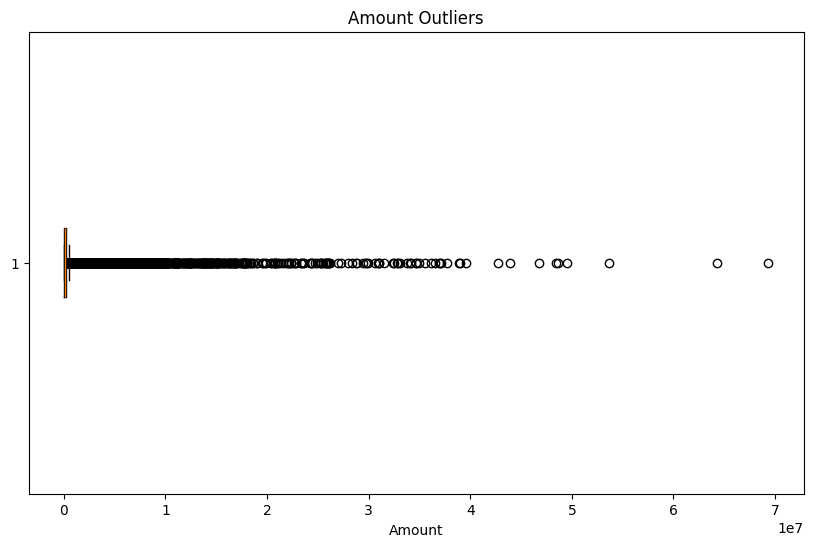

In [14]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

outliers = df[(df['amount'] < lower) | (df['amount'] > upper)]

plt.figure(figsize=(10, 6))

plt.boxplot(df['amount'],vert=False)

plt.title('Amount Outliers')
plt.xlabel('Amount')
plt.show()

In [15]:
median=df['amount'].median()
df['amount'] = np.where(
    (df['amount'] < lower) | (df['amount'] > upper),
    median,
    df['amount']
)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,75090.97,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
599995,227,CASH_OUT,245386.92,C64731634,40299.00,0.00,C542187339,2806834.77,3052221.69,0,0
599996,253,TRANSFER,425933.32,C952476591,0.00,0.00,C489575717,1585875.62,2011808.94,0,0
599997,305,PAYMENT,10504.40,C1594024598,21563.00,11058.60,M574477551,0.00,0.00,0,0
599998,230,CASH_OUT,260369.91,C1998252353,0.00,0.00,C1197561966,1850726.04,1889389.65,0,0


# Observations

- The computation of 6,000,000 Rows was resource-intensive, so I optimized it by reducing the number by approximately 10%.

- **Now the Dataset contains 600000 Rows & 11 Columns**

- **Data has 0 Missing Values & 0 Duplicated values**

- `nameOrig` all Accounts have almost 1 transaction and some Accounts in `nameDest`  has frequent multiple transaction but doesn't hold fraud cases & rest of Accounts have mostly 1 transaction, so including `nameOrig` & `nameDest` in model is not a good idea since it doesn't have any effect on output.

# Operations

In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,600000.000000,600000.000000,6.000000e+05,6.000000e+05,6.000000e+05,6.000000e+05,600000.000000,600000.000000
mean,243.554938,109802.181813,8.298214e+05,8.512176e+05,1.108386e+06,1.234302e+06,0.001267,0.000002
std,142.504800,117623.023938,2.879996e+06,2.916148e+06,3.412953e+06,3.702902e+06,0.035568,0.001291
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,13372.450000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,75090.670000,1.417162e+04,0.000000e+00,1.334155e+05,2.162842e+05,0.000000,0.000000
75%,335.000000,175530.802500,1.070595e+05,1.439193e+05,9.514710e+05,1.119947e+06,0.000000,0.000000
max,742.000000,503596.290000,3.791982e+07,3.795009e+07,3.279981e+08,3.284317e+08,1.000000,1.000000


In [17]:
df.type.unique()

array(['CASH_IN', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

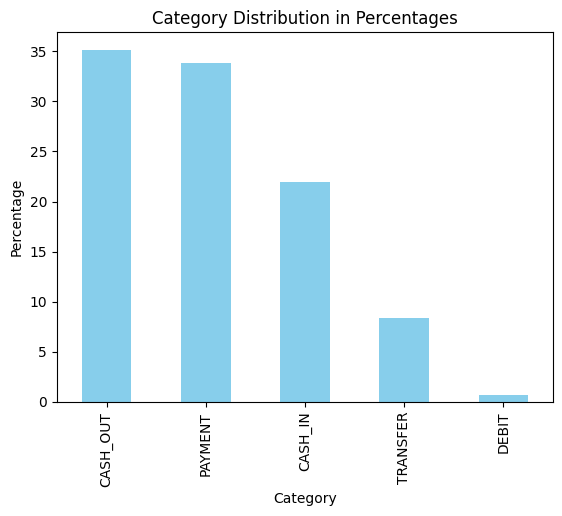

In [18]:
dist=df['type'].value_counts(normalize=True) * 100
dist.plot(kind='bar', color='skyblue')
plt.title('Category Distribution in Percentages')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

In [19]:
type_counts=df.groupby('type')['isFraud'].sum().reset_index()

In [20]:
type_counts.sort_values(by='isFraud',ascending=False)

,type,isFraud
4,TRANSFER,387
1,CASH_OUT,373
0,CASH_IN,0
2,DEBIT,0
3,PAYMENT,0


- Most transaction type in this data is Cash_out followed by Payment & Cash_in
- `TRANSFER` type of transaction has most Fraud Cases followed by `CASH_OUT` 

In [21]:
df['nameOrig'].value_counts().sort_values(ascending=False)

nameOrig
C1221785968    2
C72513097      2
C1736464590    2
C54613684      2
C148022317     2
              ..
C94444270      1
C513018655     1
C122114408     1
C1810046508    1
C1365498607    1
Name: count, Length: 599920, dtype: int64

In [22]:
df['nameDest'].value_counts().sort_values(ascending=False)

nameDest
C1234776885    15
C551495160     14
C1068824137    14
C1360767589    13
C932583850     13
               ..
C1298995630     1
M422533039      1
C1327171875     1
M685085814      1
M481120531      1
Name: count, Length: 436587, dtype: int64

In [23]:
df[df['nameDest']=='C1234776885']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29478,40,CASH_OUT,280721.91,C202663384,0.00,0.00,C1234776885,11916193.33,12196915.24,0,0
51910,5,CASH_IN,132745.75,C1478683866,5538179.71,5670925.46,C1234776885,1447866.74,944225.12,0,0
105465,11,CASH_IN,392611.39,C1982822584,343201.61,735813.00,C1234776885,8068387.47,9834194.84,0,0
131909,1,TRANSFER,75090.97,C649630909,0.00,0.00,C1234776885,1329839.38,2025098.66,0,0
153570,15,CASH_OUT,271583.01,C1139084573,250343.10,0.00,C1234776885,10954254.41,11575740.71,0,0
186665,160,CASH_OUT,62220.45,C706322542,315.00,0.00,C1234776885,17967222.95,18029443.40,0,0
241595,7,TRANSFER,75090.97,C1088476524,0.00,0.00,C1234776885,4441465.94,5424661.74,0,0
263668,1,TRANSFER,494972.01,C5255258,0.00,0.00,C1234776885,2185770.78,2025098.66,0,0
265634,6,CASH_OUT,191894.78,C164865953,180.92,0.00,C1234776885,944225.12,2315350.49,0,0
319430,179,CASH_OUT,418871.80,C774882877,88529.03,0.00,C1234776885,17856894.66,18275766.45,0,0


In [24]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [25]:
cor_matrix = df.corr(numeric_only=True)
print(cor_matrix)

X = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    step      type    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.011563 -0.010892      -0.010839       -0.010948   
type            0.011563  1.000000 -0.016552       0.259744        0.270010   
amount         -0.010892 -0.016552  1.000000       0.091562        0.101357   
oldbalanceOrg  -0.010839  0.259744  0.091562       1.000000        0.998887   
newbalanceOrig -0.010948  0.270010  0.101357       0.998887        1.000000   
oldbalanceDest  0.027954  0.063956  0.151385       0.063821        0.065269   
newbalanceDest  0.026118  0.077538  0.149152       0.039644        0.039414   
isFlaggedFraud -0.000286  0.002559 -0.000381       0.001849        0.001816   

                oldbalanceDest  newbalanceDest  isFlaggedFraud  
step                  0.027954        0.026118       -0.000286  
type                  0.063956        0.077538        0.002559  
amount                0.151385        0.149152       -0.000381  
oldbalanceOrg         0.0638

In [26]:
df[df['isFraud']=='Fraud']
#to use Fraud inputs in predicting through inputs

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
283,683,1,93483.23,C1773649560,93483.23,0.00,C2085820540,86882.30,180365.53,Fraud,0
420,294,1,75090.97,C747251675,806863.30,0.00,C1519845212,2344186.16,3151049.45,Fraud,0
548,212,4,75090.97,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,Fraud,1
952,51,1,75090.97,C555990868,1170282.92,0.00,C1318550066,173264.14,1343547.06,Fraud,0
1816,133,1,75090.97,C1724151856,1159010.44,0.00,C1229046559,175085.52,1334095.97,Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
595876,532,1,254719.63,C1634365603,254719.63,0.00,C192491518,0.00,254719.63,Fraud,0
596405,13,1,75090.97,C79951219,4022667.54,0.00,C1499489682,80136.56,4057191.21,Fraud,0
597462,205,4,128572.96,C1018357975,128572.96,0.00,C202489390,0.00,0.00,Fraud,0
597874,554,1,75090.97,C291823113,10000000.00,0.00,C1546786985,0.00,10000000.00,Fraud,0


In [27]:
from sklearn.model_selection import train_test_split
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]])
y = np.array(df[["isFraud"]])

In [28]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9994916666666667

In [29]:
#[type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[10, 1000.0, 7200.60, 0.0,0.0,7200.60]])
print(model.predict(features))

['No Fraud']


In [30]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=10)

In [31]:
scores.mean()

np.float64(0.9995450000000001)

In [33]:
def user_input():
    inp1 = int(input("Enter the Type of Transaction: CASH_OUT: 1, PAYMENT: 2, CASH_IN: 3, TRANSFER: 4, DEBIT: 5 (integer): "))
    inp2 = float(input("Enter the Amount of Transaction (float): "))
    inp3 = float(input("Enter the Balance Amount of Origin's Old Balance (float): "))
    inp4 = float(input("Enter the Balance Amount of Origin's New Balance (float): "))
    inp5 = float(input("Enter the Balance Amount of Destination's Old Balance (float): "))
    inp6 = float(input("Enter the Balance Amount of Destination's New Balance (float): "))

    inp = np.array([[inp1, inp2, inp3, inp4,inp5,inp6]])

    print(f"This Transaction would be{model.predict(inp)}")

In [34]:
user_input()

Enter the Type of Transaction: CASH_OUT: 1, PAYMENT: 2, CASH_IN: 3, TRANSFER: 4, DEBIT: 5 (integer):  1
Enter the Amount of Transaction (float):  90000
Enter the Balance Amount of Origin's Old Balance (float):  90000
Enter the Balance Amount of Origin's New Balance (float):  0
Enter the Balance Amount of Destination's Old Balance (float):  1000
Enter the Balance Amount of Destination's New Balance (float):  91000


This Transaction would be['Fraud']


In [ ]:
1	93483.23	C1773649560	93483.23	0.00	C2085820540	86882.30	180365.53